In [14]:
import pandas as pd
import numpy as np
from matrixprofile import *
from matrixprofile.discords import discords
from matplotlib import pyplot as plt
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pydotplus
from IPython.display import Image
from pandas.plotting import scatter_matrix

In [15]:
dataset = arff.loadarff('CBF/CBF_TRAIN.arff')
df = pd.DataFrame(dataset[0]) #30 record su matrice da 128 attributi + 'b': classe appartenenza  
df.shape
#df.info()


(30, 129)

In [16]:
#aggiusto e modifico i valori di target
for i in range(30):
    if (df.iloc[i, df.columns.get_loc('target')] == b'1'):
        df.iloc[i, df.columns.get_loc('target')] = '1'
        
    if (df.iloc[i, df.columns.get_loc('target')] == b'2'):
        df.iloc[i, df.columns.get_loc('target')] = '2'
        
    if (df.iloc[i, df.columns.get_loc('target')] == b'3'):
        df.iloc[i, df.columns.get_loc('target')] = '3'
    


In [17]:
for i in range(30):
    print(df.loc[i]['target'])

1
1
1
3
2
2
1
3
2
1
2
2
1
2
2
3
2
2
1
3
2
2
1
1
3
3
2
3
3
1


In [26]:
attributes = [col for col in df.columns if col != 'target']
#print(attributes)
#DIVIDO TRAINING SET IN TRAINING E TEST SET
X = df[attributes].values
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, #rapporto pattern test/training
                                                    random_state=100, #fissa quali pattern sono scelti per training e test
                                                    stratify=y)
#y_train, y_test
print(df['target'].value_counts())
print(y_train.value_counts()) #21 pattern training
print(y_test.value_counts())  #9 pattern test
print(X_train)
print(y_train)



2    12
1    10
3     8
Name: target, dtype: int64
2    8
1    7
3    6
Name: target, dtype: int64
2    4
1    3
3    2
Name: target, dtype: int64
[[-0.46427649 -0.55504787 -0.8428431  ... -0.63870583 -0.96366425
  -1.2451691 ]
 [-1.3148891  -1.3508606  -0.57481938 ... -1.5767386  -0.83416965
  -0.75750669]
 [-0.92710486 -0.64851524 -0.17287512 ... -0.8728463   0.12931092
  -0.14265778]
 ...
 [-1.1864222  -0.89319697 -0.97773692 ... -0.98159057 -1.2784443
  -1.1078289 ]
 [-0.54187618 -1.016107   -1.0799024  ... -0.31455899 -1.1107676
   0.10526572]
 [-1.4113675  -1.2082199  -0.68190674 ... -1.1610456  -0.96438276
  -1.3161164 ]]
0     1
24    3
19    3
14    2
21    2
20    2
2     1
16    2
28    3
1     1
22    1
10    2
27    3
17    2
15    3
13    2
12    1
3     3
9     1
11    2
18    1
Name: target, dtype: object


In [19]:
le = LabelEncoder() #funzione per normalizzare le labels dei target class
num_classes = le.fit_transform(df['target'])
print(num_classes)
num_classes2=np.unique(num_classes, return_counts=True) #rimuove tutti i duplicati nell'array
print(num_classes2)

[0 0 0 2 1 1 0 2 1 0 1 1 0 1 1 2 1 1 0 2 1 1 0 0 2 2 1 2 2 0]
(array([0, 1, 2]), array([10, 12,  8], dtype=int64))


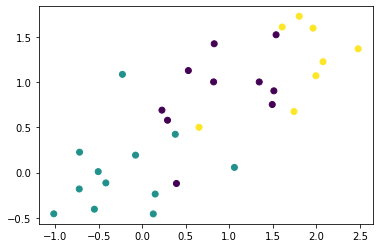

In [20]:
plt.scatter(df['att37'], df['att45'],c=num_classes) #scatter mi permette di "disegnare" il piano in 2d, mettendo attributi, e avere graficamente classificazione lineare 
#i punti sono pattern, collocati in base al valore dei due attributi
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, random_state=13) #fissando random state ho sempre lo stesso valore e non ho ranodmicità nello split
clf.fit(X_train, y_train) #genera DTree allenato su tr set

DecisionTreeClassifier(criterion='entropy', random_state=13)

In [22]:
print(clf.classes_)
print(clf.n_features_)

['1' '2' '3']
128


In [23]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

att1 0.0
att2 0.0
att3 0.0
att4 0.0
att5 0.0
att6 0.0
att7 0.0
att8 0.0
att9 0.0
att10 0.0
att11 0.0
att12 0.0
att13 0.0
att14 0.0
att15 0.0
att16 0.0
att17 0.0
att18 0.0
att19 0.0
att20 0.0
att21 0.0
att22 0.0
att23 0.0
att24 0.0
att25 0.0
att26 0.0
att27 0.0
att28 0.0
att29 0.0
att30 0.0
att31 0.0
att32 0.0
att33 0.0
att34 0.0
att35 0.0
att36 0.0
att37 0.3913383266175454
att38 0.0
att39 0.0
att40 0.0
att41 0.0
att42 0.0
att43 0.0
att44 0.0
att45 0.6086616733824546
att46 0.0
att47 0.0
att48 0.0
att49 0.0
att50 0.0
att51 0.0
att52 0.0
att53 0.0
att54 0.0
att55 0.0
att56 0.0
att57 0.0
att58 0.0
att59 0.0
att60 0.0
att61 0.0
att62 0.0
att63 0.0
att64 0.0
att65 0.0
att66 0.0
att67 0.0
att68 0.0
att69 0.0
att70 0.0
att71 0.0
att72 0.0
att73 0.0
att74 0.0
att75 0.0
att76 0.0
att77 0.0
att78 0.0
att79 0.0
att80 0.0
att81 0.0
att82 0.0
att83 0.0
att84 0.0
att85 0.0
att86 0.0
att87 0.0
att88 0.0
att89 0.0
att90 0.0
att91 0.0
att92 0.0
att93 0.0
att94 0.0
att95 0.0
att96 0.0
att97 0.0
att98 0.0

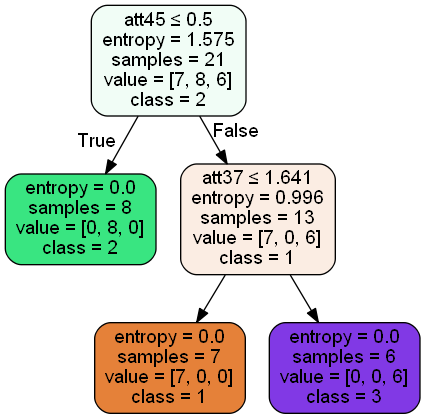

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
#COSTRUITO IL DECISION TREE, TRAINATO SU TRAINING SET

[Text(133.92000000000002, 181.2, 'X[44] <= 0.5\nentropy = 1.575\nsamples = 21\nvalue = [7, 8, 6]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(200.88000000000002, 108.72, 'X[36] <= 1.641\nentropy = 0.996\nsamples = 13\nvalue = [7, 0, 6]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]')]

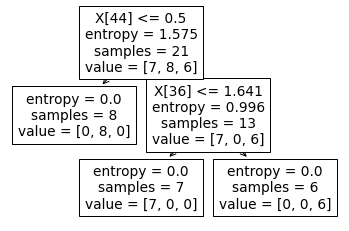

In [32]:
tree.plot_tree(clf) 

In [33]:
y_pred = clf.predict(X_train) #applico DT al training set e ovviamente va benissimo
for y_p, y_tar in zip(y_pred, y_train):
    print(y_p, y_tar)
print(classification_report(y_train, y_pred))
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

1 1
3 3
3 3
2 2
2 2
2 2
1 1
2 2
3 3
1 1
1 1
2 2
3 3
2 2
3 3
2 2
1 1
3 3
1 1
2 2
1 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy 1.0
F1-score [1. 1. 1.]


In [18]:
y_predTest = clf.predict(X_test)
print(len(y_predTest))
for y_p, y_tar in zip(y_predTest, y_test):
    print(y_p, y_tar)

print(classification_report(y_test, y_predTest))
print('Accuracy %s' % accuracy_score(y_test, y_predTest))
print('F1-score %s' % f1_score(y_test, y_predTest, average=None))
confusion_matrix(y_test, y_predTest)

9
1 1
2 2
2 2
2 3
2 1
1 2
2 2
1 3
1 1
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         2

    accuracy                           0.56         9
   macro avg       0.37      0.47      0.41         9
weighted avg       0.43      0.56      0.49         9

Accuracy 0.5555555555555556
F1-score [0.57142857 0.66666667 0.        ]


C:\Users\Allen\softwaretesi1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[2, 1, 0],
       [1, 3, 0],
       [1, 1, 0]], dtype=int64)